UTS_Machine Learning_K-Means_Spotify Dataset

*   Muhammad Fauzan Nur'ilham
*   1103204085


*   Dataset : Penguins Species
*   Model : K-means

# Memanggil Dataset dari googel colab dan mengimpor library

prompt : Berikan saya kode untuk memanggil dataset pada google drive dan mengimport library panda dengan dataframe "df"

In [2]:
import pandas as pd
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# ganti path dengan lokasi dataset yang ada
file_path = ('/content/drive/MyDrive/Machine Learning/Dataset/penguins.csv')

# membaca dataset kedalam dataframe
df = pd.read_csv(file_path)

Prompt : berikan kode untuk menampilkan 5 baris pertama dan 5 baris terakhir dari dataset tersebut

In [5]:
# Menampilkan 5 baris pertama
print("5 Baris Pertama:")
print(df.head())

# Menampilkan 5 baris terakhir
print("\n5 Baris Terakhir:")
print(df.tail())

5 Baris Pertama:
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE

5 Baris Terakhir:
     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
339               NaN              NaN                NaN          NaN     NaN
340              46.8             14.3              215.0       4850.0  FEMALE
341              50.4             15.7              222.0       5750.0    MALE
342              45.2             14.8              212.0       5200.0  FEMALE
343              49.9             16.1              213.0       5400.0    MALE


# EDA
Exploratory Data Analysis (EDA) adalah suatu proses uji investigasi awal yang bertujuan untuk mengidentifikasi pola, menemukan anomali, menguji hipotesis dan memeriksa asumsi.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


Output :

1.   Memiliki 342 Rows dengan 5 kolom
2.   Memiliki tipe data float dan object
3.   Untuk kolom sex, terdapat 335 nilai non-null, yang berarti ada beberapa nilai yang hilang

In [7]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


prompt : berikan kode untuk memeriksa dan menghapus nilai NaN pada dataset

---



In [16]:
# Memeriksa nilai NaN dalam DataFrame
print("Jumlah nilai NaN untuk setiap kolom:")
print(df.isnull().sum())

# Menghapus baris yang mengandung nilai NaN
df_cleaned = df.dropna()

# Memeriksa apakah masih ada nilai NaN setelah pembersihan
print("\nJumlah nilai NaN setelah pembersihan:")
print(df_cleaned.isnull().sum())

Jumlah nilai NaN untuk setiap kolom:
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

Jumlah nilai NaN setelah pembersihan:
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


# Data Visualization
Visualisasi data adalah proses menggunakan elemen visual seperti diagram, grafik, atau peta untuk merepresentasikan data. Visualisasi data menerjemahkan yang kompleks, bervolume tinggi, atau numerik menjadi representasi visual yang lebih mudah diproses. Alat visualisasi data meningkatkan dan mengotomatiskan proses komunikasi visual untuk mendapatkan akurasi dan detail. Anda dapat menggunakan representasi visual untuk mengekstraksi wawasan yang dapat ditindaklanjuti dari data mentah.


prompt : Berikan kode untuk menampilan visualisasi data dari dataset dengan kolom culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g

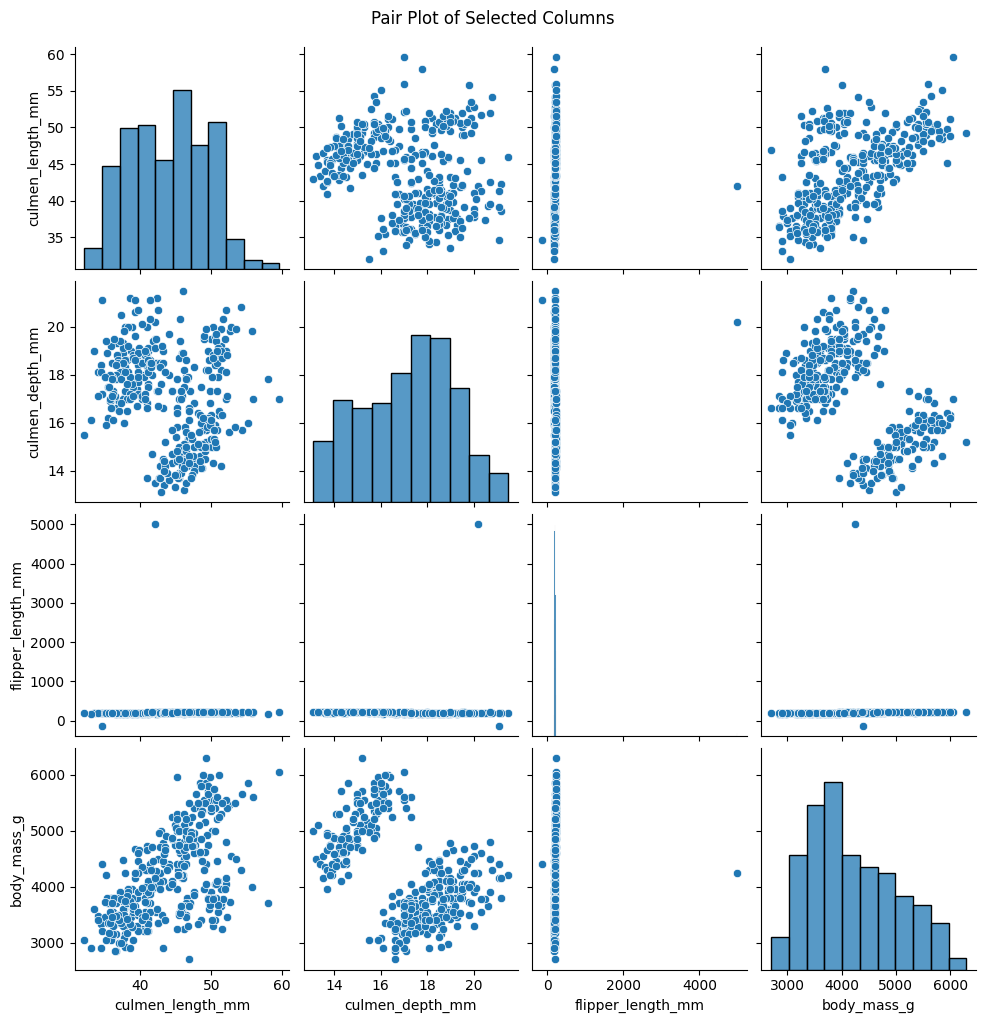

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Memilih kolom-kolom yang akan divisualisasikan
selected_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Memilih subset data yang hanya mengandung kolom-kolom yang dipilih
subset_df = df[selected_columns]

# Pair plot untuk melihat hubungan antar kolom
sns.pairplot(subset_df)
plt.suptitle("Pair Plot of Selected Columns", y=1.02)
plt.show()

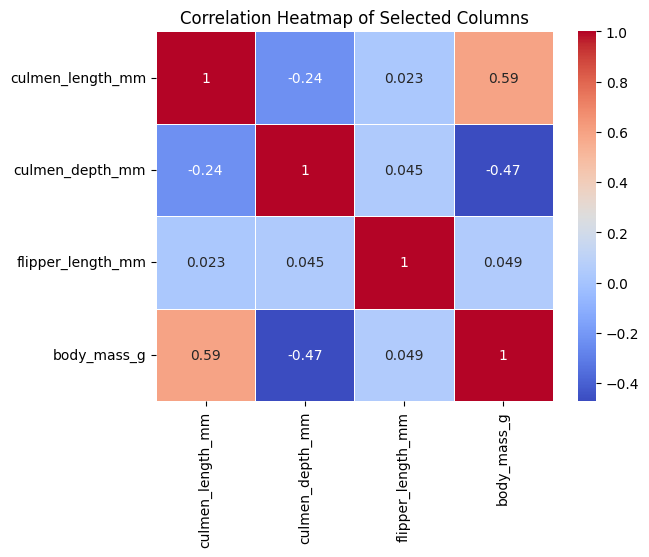

In [18]:
# Korelasi heatmap untuk melihat korelasi antar kolom
correlation_matrix = subset_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Selected Columns")
plt.show()

# Training
Training model dalam Machine Learning merupakan proses untuk menjalankan algoritma Machine Learning untuk mengolah dataset yang sudah dibagi menjadi data training dan mengoptimalkan algoritma untuk menemukan pola atau output tertentu.

prompt : berikan kode untuk melakukan training k-means clustering dari dataset diatas

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


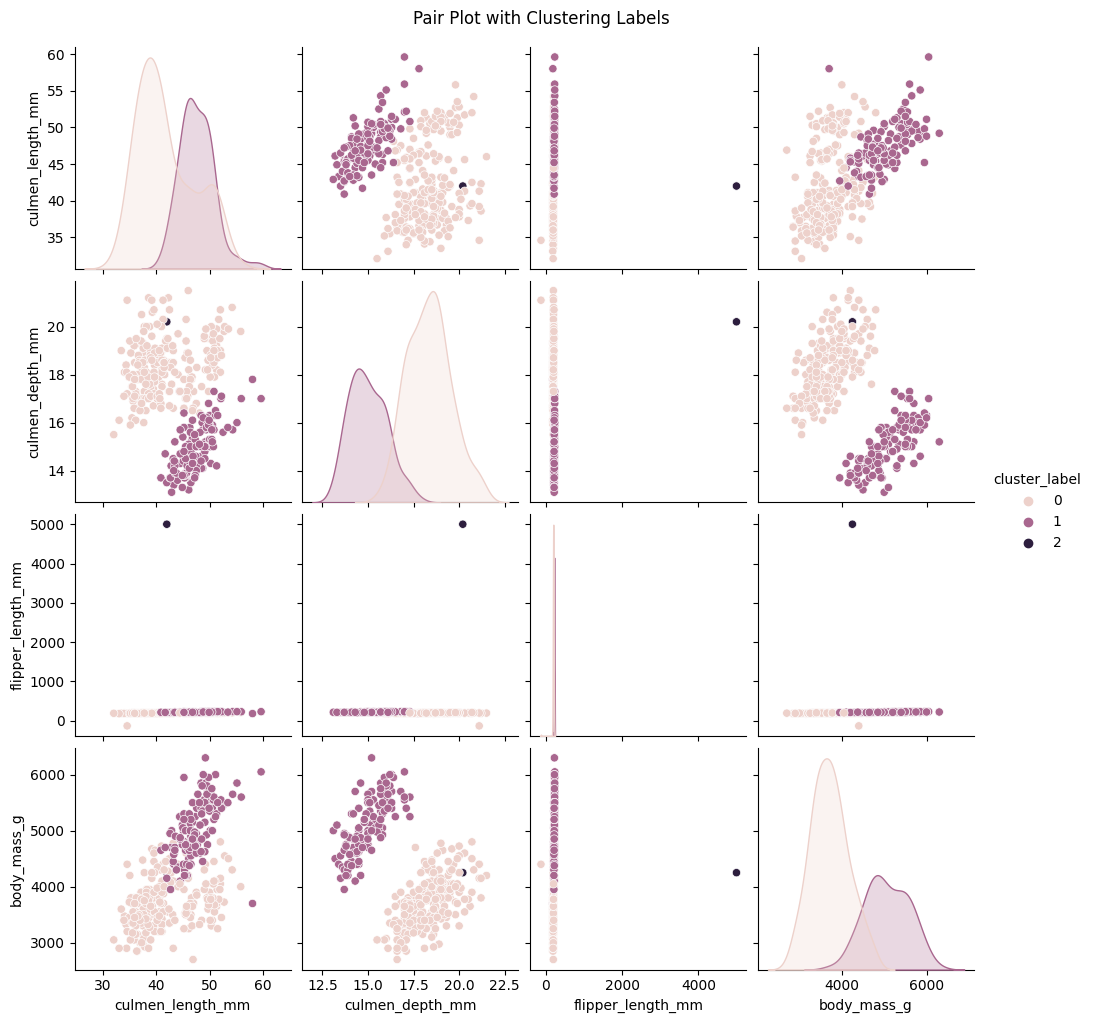

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Memilih kolom-kolom yang akan digunakan untuk clustering
features = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Normalisasi fitur
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Menentukan jumlah cluster (misalnya, 3 cluster)
num_clusters = 3

# Membuat dan melatih model k-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features_scaled)

# Menambahkan label cluster ke dalam DataFrame
df['cluster_label'] = kmeans.labels_

# Menampilkan hasil clustering
sns.pairplot(df, hue='cluster_label', vars=selected_columns)
plt.suptitle("Pair Plot with Clustering Labels", y=1.02)
plt.show()

Output : melakukan clustering pada data yang diambil dari kolom-kolom tertentu dalam DataFrame (culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g). Setelah clustering selesai, label kluster ditambahkan ke DataFrame, dan pair plot ditampilkan menggunakan seaborn dengan warna yang berbeda untuk setiap kluster.

# Evaluating
Model evaluation merupakan bagian integral dari proses pengembangan model hal ini bertujuan untuk menemukan model terbaik yang mewakili data kita dan seberapa baik generalisasi model yang dipilih tersebut akan bekerja pada data yang belum pernah dilihat sebelumnya.

In [20]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Menghitung Davies-Bouldin Index
db_index = davies_bouldin_score(features_scaled, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index}")

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(features_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Davies-Bouldin Index: 0.5494118664044174
Silhouette Score: 0.496130534135137


Davies-Bouldin Index dan Silhouette Score adalah dua metrik evaluasi yang memberikan informasi tentang kualitas clustering hasil algoritma K-Means.

Davies-Bouldin Index:
*   Nilai Davies-Bouldin Index yang lebih rendah menunjukkan hasil clustering yang lebih baik.
*   Nilai ini diukur sebagai rasio dari "tingkat kepadatan yang baik antar kluster" dengan "tingkat kepadatan terburuk dalam kluster". Semakin rendah nilai Davies-Bouldin Index, semakin baik, dengan 0 sebagai nilai terbaik.
*   Dalam konteks output ini (0.5494), nilai ini menunjukkan tingkat pemisahan yang relatif baik antara kluster dan tingkat keseragaman yang cukup baik dalam kluster.


Silhouette Score:
*   Silhouette Score mengukur seberapa dekat setiap titik data dalam kluster dengan titik-titik lain dalam kluster yang sama dibandingkan dengan kluster lainnya.
*   Nilai Silhouette Score berkisar dari -1 hingga 1. Nilai yang lebih tinggi menunjukkan hasil clustering yang lebih baik, dengan 1 sebagai nilai terbaik.
*   Dalam konteks output ini (0.4961), nilai ini menunjukkan bahwa sebagian besar titik data memiliki tingkat kesamaan yang cukup tinggi dengan titik-titik lain dalam kluster mereka dan sejauh mungkin dari kluster lainnya.
*   Dalam kedua metrik ini, interpretasi tergantung pada konteks spesifik dari data dan masalah yang sedang dihadapi. Secara umum, nilai-nilai yang mendekati 0 (Davies-Bouldin Index) dan mendekati 1 (Silhouette Score) dianggap indikasi hasil clustering yang baik.

# Inputing New Data

In [21]:
# Load dataset
df = pd.read_csv(file_path)  # Ganti dengan nama file dataset yang sesuai

# Pilih fitur yang digunakan untuk clustering
selected_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Mengatasi nilai NaN dengan menggantinya dengan nilai median
df.fillna(df.median(), inplace=True)

features = df[selected_columns]

# Normalisasi fitur
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Menentukan jumlah cluster (misalnya, 3 cluster)
num_clusters = 3

# Membuat dan melatih model K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features_scaled)

# Membuat data baru untuk diprediksi
new_data = pd.DataFrame({
    'culmen_length_mm': [50.4],
    'culmen_depth_mm': [14.3],
    'flipper_length_mm': [213.0],
    'body_mass_g': [5200.0]
})

# Normalisasi data baru
new_data_scaled = scaler.transform(new_data)

# Prediksi kluster untuk data baru
predicted_cluster = kmeans.predict(new_data_scaled)

# Menampilkan hasil prediksi kluster
print(f"Predicted Cluster: {predicted_cluster}")

Predicted Cluster: [1]


<ipython-input-21-39b61077925d>:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Output yang diberikan adalah hasil dari prediksi kluster untuk data baru yang dimasukkan ke dalam model K-Means. Output ini menunjukkan bahwa data baru tersebut diprediksi berada dalam kluster dengan indeks 1.